In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,15)

In [10]:
#load image
img = cv2.imread('imgs/sample1.jpg', cv2.IMREAD_GRAYSCALE)


In [15]:
#show in popup
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

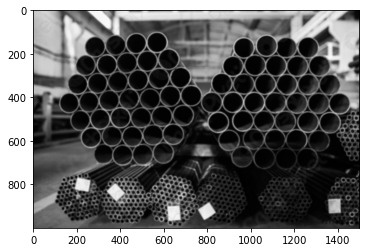

In [11]:
#plot
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.show()

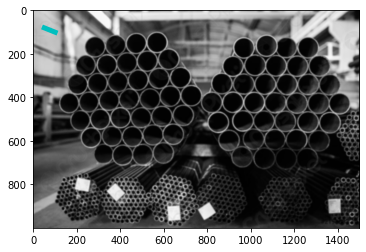

In [14]:
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.plot([50,100],[80,100],'c',linewidth=5)  #draw line over image , c=cyan
plt.show()

**draw and write on image via openCV**

openCV -- BGR color (255,255,255)

**lines, rectangles, circles, polygons, text**

In [21]:
cv2.line(img, (0,0), (500,500), (255,255,0), 15)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
cv2.rectangle(img, (0,0), (120,120), (0,255,0), 15)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
cv2.circle(img, (90,80), 55, (0,0,255), 1)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
pts = np.array([[10,5],[20,30],[70,30],[50,10]],np.int32)
cv2.polylines(img, [pts], True, (0,255,255), 3)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, 'Hello World', (200,130), font, 1, (200,120,255), 2, cv2.LINE_AA)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**image operations**


_load image_

_convert to gray_

_perform analysis_

_super impose cordinates on original coloured_

In [36]:
img = cv2.imread('imgs/sample1.jpg', cv2.IMREAD_COLOR)

#reference a pixel [location,location]
pixel = img[55,55]

#print the color value of the pixel
print(pixel)

#convert that known pixel point to white
#img[55,55] = [255 255 255]


[161 189 206]


In [40]:
#ROI - Region of Image

roi = img[100:150, 100:150]

#print(roi)

#replace a region with white
img[100:150, 100:150] = [255,255,255]


cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
#superimpose a selected portion on another portion

selected_portion = img[200:250, 300:350]

# 200:250 = 50, 300:350 = 50
img[0:50, 0:50] = selected_portion

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**homography**

feature matching - bruteforce style

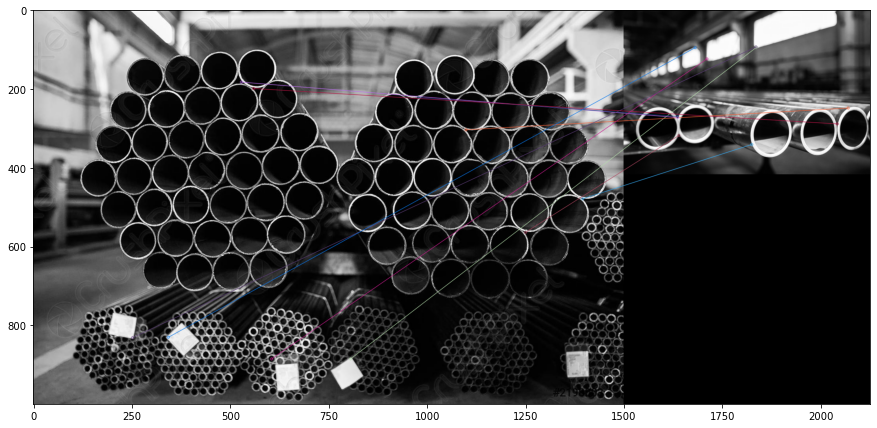

In [50]:
img1 = cv2.imread('imgs/sample1.jpg', 0)
img2 = cv2.imread('imgs/sample2.jpg', 0)


orb = cv2.ORB_create()

keypoint1, descriptor1 = orb.detectAndCompute(img1, None)
keypoint2, descriptor2 = orb.detectAndCompute(img2, None)


bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


#find matches and sort based on confidence

matches = bf.match(descriptor1, descriptor2)
matches = sorted(matches, key = lambda x:x.distance) #from most likely to least

img3 = cv2.drawMatches(img1, keypoint1, img2, keypoint2, matches[:10], None, flags=2) #top 10 matchess


plt.imshow(img3)